# Reti Neurali

In questo laboratorio vedremo come applicare le reti neurali al dataset **Iris**.
Iniziamo con l'import del dataset.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dividiamo il dataset di iris in train e test

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df["target"], test_size=0.3, random_state=42)

Per migliorare il training della rete neurale, standardizziamo tutte le features

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[iris.feature_names] = scaler.fit_transform(X_train[iris.feature_names])
X_test[iris.feature_names] = scaler.transform(X_test[iris.feature_names])

X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,2.541882e-15,-9.755094e-16,-2.706829e-16,1.353415e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.860374e+00,-2.421442e+00,-1.617194e+00,-1.540971e+00
25%,-8.957355e-01,-5.025635e-01,-1.266959e+00,-1.135113e+00
50%,-5.167705e-02,-2.284379e-02,2.507234e-01,8.245999e-02
75%,6.718016e-01,6.967357e-01,7.177026e-01,7.588896e-01
max,2.239339e+00,2.855474e+00,1.651661e+00,1.705891e+00


Convertiamo la label a categorica. In questo lab useremo la libreria **Keras**, poichè consente di implementare facilmente le reti neurali. Invece, la libreria Scikit-learn viene usata per modelli di machine learning base.

Ogni etichetta di classe sarà mappata ad un vettore one-hot:
* etichetta 1 --> [1, 0, 0]
* etichetta 2 --> [0, 1, 0]
* etichetta 3 --> [0, 0, 1]

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

A questo punto, utilizziamo la libreria **Keras** che permette di implementare facilmente una rete neurale

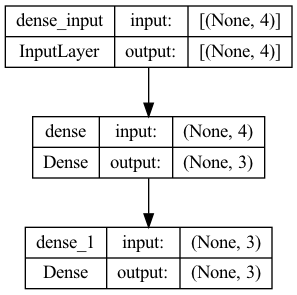

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'archietettura della rete neurale:
# un primo layer di input con 4 neuroni (perchè ci sono 4 features in input)
# un scondo layer con 3 neuroni
# un ultimo layer con 3 neuroni, poiché la label è un vettore di 3 componenti (es [0, 1, 0])
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

Facciamo il training della rete e valutiamo le performance

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
21/21 [==============================] - 1s 12ms/step - loss: 1.8054 - accuracy: 0.2762 - val_loss: 2.1821 - val_accuracy: 0.1778
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 1.7288 - accuracy: 0.2762 - val_loss: 2.0818 - val_accuracy: 0.1778
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 1.6583 - accuracy: 0.2952 - val_loss: 1.9802 - val_accuracy: 0.1778
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5886 - accuracy: 0.3048 - val_loss: 1.8883 - val_accuracy: 0.2222
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5221 - accuracy: 0.3714 - val_loss: 1.8060 - val_accuracy: 0.2889
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 1.4621 - accuracy: 0.3905 - val_loss: 1.7194 - val_accuracy: 0.3111
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 1.4015 - accuracy: 0.4095 - val_loss: 1.6442 - val_accuracy: 0.3333
Epoch 8/10
21/21 [=

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

In [10]:
# serialize weights to HDF5
model.save_weights("drive/MyDrive/Machine Learning 2023-2024/model.h5")
print("Saved model to disk")
model_json = model.to_json()
with open("drive/MyDrive/Machine Learning 2023-2024/model.json", "w") as json_file:
    json_file.write(model_json)

Saved model to disk


## Assignment

1. Provare ad usare diverse funzioni di attivazione, come "tanh".
2. Quante epoche sono necessarie per raggiungere la convergenza?
3. Cosa succede cambiando l'architettura della rete?
4. Cosa succede cambiando la loss function?